In [2]:
#script to generate animations of the CMB and varying parameters. In the example, varying only H0, Omegac and Omegab
#but straightforward to make other plots 
#in order for this script to work you need to have pycamb installed. 

%matplotlib inline
%pylab inline
import numpy as np
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML
#uncomment this if you are running remotely and want to keep in synch with repo changes
#if platform.system()!='Windows':
#    !cd $HOME/git/camb; git pull github master; git log -1
print('Using CAMB installed at '+ os.path.realpath(os.path.join(os.getcwd(),'..')))
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
import camb
from camb import model, initialpower

#from scipy.misc import derivative as 

Populating the interactive namespace from numpy and matplotlib
Using CAMB installed at /mnt/scratch-lustre/RAID-CITA/meerburg/PLANCK_features/camb


In [6]:
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(ns=0.965, r=0, As = 2.1e-09)

#set lmax 
lMaxx = 3000

pars.set_for_lmax(lMaxx, lens_potential_accuracy=0);

In [7]:
pars.Reion.Reionization = True
pars.Reion.delta_redshift = 0.2
pars.AccurateReionization = True
pars.AccuratePolarization = True
pars.Reion.use_optical_depth = True
pars.Reion.fraction = -1
pars.Reion.redshift = 10

pars.Recomb.RECFAST_fudge = 1.14
pars.Recomb.RECFAST_fudge_He = 0.86
pars.Recomb.RECFAST_Heswitch = 6
pars.Recomb.RECFAST_Hswitch  = True

pars.Want_CMB = True


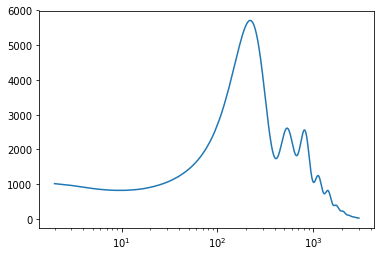

In [8]:
#testing

#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
#pars.Reion.redshift = 4
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.05)
#I am using a modified version of CAMB. Uncommend the line below if you use a generic version:
#pars.InitPower.set_params(ns=0.965, r=0, As = 2.1e-09)
pars.InitPower.set_params(ns=0.965, r=0, log10_f = -3, delta_ns = 0, paxion_f = 0.75, As = 2.1e-09)
pars.set_for_lmax(lMaxx, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)

totCL=powers['total']
ls = np.arange(totCL.shape[0])

#note: I am multiplying w T_CMB^2. I think in the latest version of pycamb you can add this as a flag. But not in
#the version I had installed. Perhaps there is a better way, just could not find it. 
plt.semilogx(ls[2:3000],7.42835025e12*totCL[2:3000,0])
#plt.plot(ls,totCL2[:,1])
plt.show()

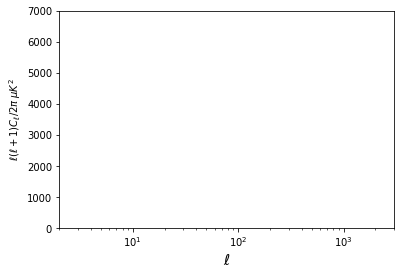

In [6]:
# First set up the figure, the axis, and the plot element we want to animate
#if you do not want the CMB + CV error on the plot below, use this version
fig, ax = plt.subplots()

ax.set_xlim((2,3000))
ax.set_ylim((0,7000))
ax.set_ylabel('$\ell(\ell+1) C_{\ell}/2\pi\; \mu K^2$',fontsize=10)
ax.set_xlabel('$\ell$',fontsize=15)
line, = ax.semilogx([], [], lw=2,color="red")

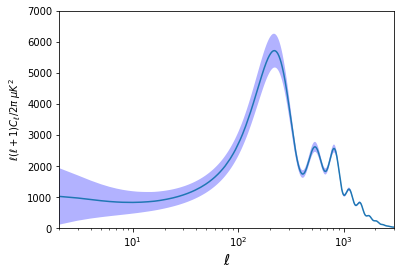

In [16]:
#alternative with spectrum + cosmic variance
#note that in many popular figures you find online the CV error bar is binned at high ell
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.05)
pars.InitPower.set_params(ns=0.965, r=0, log10_f = -3, delta_ns = 0, paxion_f = 0.75, As = 2.1e-09)
pars.set_for_lmax(lMaxx, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)


totCL=powers['total']
ls = np.arange(totCL.shape[0])

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 2, 3000))
ax.set_ylim((0,7000))
ax.set_ylabel('$\ell(\ell+1) C_{\ell}/2\pi\; \mu K^2$',fontsize=10)
ax.set_xlabel('$\ell$',fontsize=15)
ax.semilogx(ls[2:3000],7.42835025e12*totCL[2:3000,0])
#adding shaded cosmic variance errors
ax.fill_between(ls[2:3000], 7.42835025e12*totCL[2:3000,0]+2*7.42835025e12*totCL[2:3000,0]/np.sqrt(2*ls[2:3000]+1), 7.42835025e12*totCL[2:3000,0]-2*7.42835025e12*totCL[2:3000,0]/np.sqrt(2*ls[2:3000]+1), facecolor='blue', alpha=0.3)
line, = ax.semilogx([], [], lw=2,color="red")

In [17]:
# the number identify the location of the text in the figure 
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

In [18]:
#initialize for animation
def init():
    line.set_data([], [])
    return line,
    

In [34]:
# animation function. This is called sequentially
def animate(i):
    #x = np.linspace(0, 2, 1000)
    #y = np.sin(2 * np.pi * (x - 0.01 * i))
    h0 = 45+0.2*i
    pars.set_cosmology(h0, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.05)
    pars.InitPower.set_params(ns=0.965, r=0, log10_f = -3, delta_ns = 0, paxion_f = 0.75, As = 2.1e-09)
    pars.set_for_lmax(lMaxx, lens_potential_accuracy=0);
    results = camb.get_results(pars)
    powers =results.get_cmb_power_spectra(pars)
    totCL=powers['total']
    ls = np.arange(totCL.shape[0])
    x = ls[2:3000]
    y = 7.42835025e12*totCL[2:3000,0]
    #this is the number you will see in the figure on the top left (0.02-x/0.95-y)
    time_text.set_text('$H_0$ = %.1f' % h0)
    line.set_data(x, y)
    return (line,)

In [37]:
# call the animator. blit=True means only re-draw the parts that have changed.
#the number of frames is the number of samples in [i] above. The interval i think is not so relevant here since 
#everything is converted to mp4. In that case only the fps matters (see below). 
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=2000, blit=True)

In [19]:
#adding some settings. Found this online because I got some error. 
FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib', comment='Movie support!') 
writer = FFMpegWriter(fps=10, metadata=metadata, codec='mpeg4',bitrate=-1)

In [20]:
#default is about 100 I think, which leads to really blurry plots
dpi = 250

In [40]:
%%time
#put the name of the movie
anim.save('H0_v1.mp4', writer=writer, dpi=dpi)

CPU times: user 4h 52min 36s, sys: 10min 21s, total: 5h 2min 57s
Wall time: 13min 31s


In [27]:
#same, now for omegab
def animate(i):
    #x = np.linspace(0, 2, 1000)
    #y = np.sin(2 * np.pi * (x - 0.01 * i))
    omegab = 0.01+0.002*i
    h0 = 0.68
    pars.set_cosmology(100*h0, ombh2=omegab*h0*h0, omch2=0.122, mnu=0.06, omk=0, tau=0.05)
    pars.InitPower.set_params(ns=0.965, r=0, log10_f = -3, delta_ns = 0, paxion_f = 0.75, As = 2.1e-09)
    pars.set_for_lmax(lMaxx, lens_potential_accuracy=0);
    results = camb.get_results(pars)
    powers =results.get_cmb_power_spectra(pars)
    totCL=powers['total']
    ls = np.arange(totCL.shape[0])
    x = ls[2:3000]
    y = 7.42835025e12*totCL[2:3000,0]
    time_text.set_text('$\Omega_b$ = %.3f' % omegab)
    line.set_data(x, y)
    return (line,)

In [33]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=30, interval=2000, blit=True)

In [34]:
%%time
anim.save('Omegab_v1.mp4', writer=writer, dpi=dpi)

CPU times: user 43min 57s, sys: 1min 29s, total: 45min 26s
Wall time: 1min 48s


In [35]:
#same, now for omegac
def animate(i):
    #x = np.linspace(0, 2, 1000)
    #y = np.sin(2 * np.pi * (x - 0.01 * i))
    omegac = 0.01*i
    h0 = 0.68
    pars.set_cosmology(100*h0, ombh2=0.022, omch2=omegac*h0*h0, mnu=0.06, omk=0, tau=0.05)
    pars.InitPower.set_params(ns=0.965, r=0, log10_f = -3, delta_ns = 0, paxion_f = 0.75, As = 2.1e-09)
    pars.set_for_lmax(lMaxx, lens_potential_accuracy=0);
    results = camb.get_results(pars)
    powers =results.get_cmb_power_spectra(pars)
    totCL=powers['total']
    ls = np.arange(totCL.shape[0])
    x = ls[2:3000]
    y = 7.42835025e12*totCL[2:3000,0]
    time_text.set_text('$\Omega_c$ = %.2f' % omegac)
    line.set_data(x, y)
    return (line,)

In [36]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=2000, blit=True)

In [37]:
%%time
anim.save('Omegac_v1.mp4', writer=writer, dpi=dpi)

CPU times: user 1h 14min 42s, sys: 2min 30s, total: 1h 17min 13s
Wall time: 3min 2s


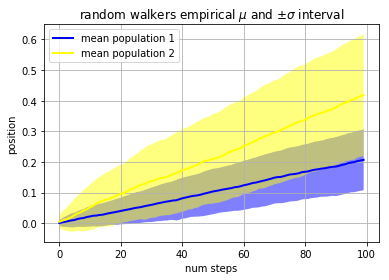

In [4]:
#example of shaded error bar that I used above 

Nsteps, Nwalkers = 100, 250
t = np.arange(Nsteps)

# an (Nsteps x Nwalkers) array of random walk steps
S1 = 0.002 + 0.01*np.random.randn(Nsteps, Nwalkers)
S2 = 0.004 + 0.02*np.random.randn(Nsteps, Nwalkers)

# an (Nsteps x Nwalkers) array of random walker positions
X1 = S1.cumsum(axis=0)
X2 = S2.cumsum(axis=0)


# Nsteps length arrays empirical means and standard deviations of both
# populations over time
mu1 = X1.mean(axis=1)
sigma1 = X1.std(axis=1)
mu2 = X2.mean(axis=1)
sigma2 = X2.std(axis=1)

# plot it!
fig, ax = plt.subplots(1)
ax.plot(t, mu1, lw=2, label='mean population 1', color='blue')
ax.plot(t, mu2, lw=2, label='mean population 2', color='yellow')
ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='blue', alpha=0.5)
ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)
ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()

In [14]:
ls[2]

2